
# **Task 4: Stock Market & News Headline Prediction using Numerical and Textual Analysis**

<br/>
<br/>

### **Problem Statement:**
Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis
of news headlines.
<br/>
<br/>




### Author:  **MD. Mehedi Hassan Galib**  
Department of Civil Engineering  
Rajshahi University of Engineering and Technology (RUET)  
Rajshahi-6204, Bangladesh  
**Email**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:**  galibmehedihassan@gmail.com  
**LinkedIn**&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.linkedin.com/in/mehedi-hassan-galib)  
**Kaggle**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **:** [Mehedi Hassan Galib](https://www.kaggle.com/galibce003)  
**Github**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**:** [Mehedi Hassan Galib](https://www.github.com/galibce003)  

<br/>
<br/>

## <font color = green>**Table of Content</font>**  
#### **<font color = red>Numerical Analysis</font>**  
<font color = blue>1. Importing necessary modules</font>  
<font color = blue>2. Getting the dataset</font>  
<font color = blue>3. Reconnaissance</font>  
<font color = blue>4. Feature Engineering</font>  
<font color = blue>5. Vanilla RNN</font>  
<font color = blue>6. Prediction</font>  
<font color = blue>7. Model Accuracy</font>  

#### **<font color = red>Textual Analysis</font>**  
<font color = blue>1. Importing necessary modules</font>  
<font color = blue>2. Getting the dataset</font>  
<font color = blue>3. Reconnaissance</font>  
<font color = blue>4. Feature Engineering</font> 

<br/>
<br/>

# **<font color = red>Numerical Analysis</font>**
<br/>

## <font color = blue>**1. Importing necessary modules**</font>

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

<br/>

## <font color = blue>**2. Getting the dataset**</font>

In [ ]:
df = pdr.get_data_tiingo('GOOGL', api_key= '**********************')
df.to_csv('GOOGL.csv')

<br/>

## <font color = blue>**3. Reconnaissance**</font>

<br/>

##### **First few rows of the dataset**

In [ ]:
df.head()

close    high  ...  divCash  splitFactor
symbol date                                       ...                      
GOOGL  2015-10-12 00:00:00+00:00  676.43  677.98  ...      0.0          1.0
       2015-10-13 00:00:00+00:00  683.17  688.46  ...      0.0          1.0
       2015-10-14 00:00:00+00:00  680.41  690.04  ...      0.0          1.0
       2015-10-15 00:00:00+00:00  693.02  694.16  ...      0.0          1.0
       2015-10-16 00:00:00+00:00  695.32  696.22  ...      0.0          1.0

[5 rows x 12 columns]



##### **Last few rows of the dataset**

In [ ]:
df.tail()

close       high  ...  divCash  splitFactor
symbol date                                           ...                      
GOOGL  2020-10-05 00:00:00+00:00  1482.83  1484.7000  ...      0.0          1.0
       2020-10-06 00:00:00+00:00  1451.02  1484.5200  ...      0.0          1.0
       2020-10-07 00:00:00+00:00  1459.14  1468.9700  ...      0.0          1.0
       2020-10-08 00:00:00+00:00  1483.43  1488.0275  ...      0.0          1.0
       2020-10-09 00:00:00+00:00  1510.45  1511.8500  ...      0.0          1.0

[5 rows x 12 columns]

<br/>

##### **Plotting the <font color = green>low</font> variable**

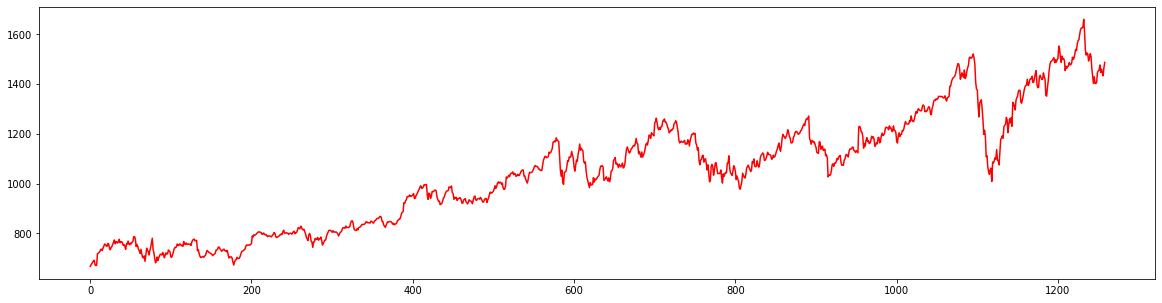

In [ ]:
plt.figure(figsize = (20, 5))

df1 = df.reset_index()['low']
plt.plot(df1, color = 'red')
plt.show()

<br/>

## <font color = blue>**4. Feature Engineering**</font>

<br/>

##### **Scaling**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

##### **Splitting the dataset into <font color = green>Train</font>, <font color = green>Test</font> and <font color = green>Validation</font> set**

In [ ]:
train, valid, test = df1[0:882, :], df1[882:1008, :], df1[1008:, :]

##### **Creating a function to splitting the Train, Test and Validation set into <font color = green>X</font> and <font color = green>y</font>**

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

##### **Splitting into <font color = green>X</font> and <font color = green>y</font>**

In [ ]:
time_step = 100

X_train, y_train = create_dataset(train, time_step)
X_val, y_val = create_dataset(valid, time_step)
X_test, y_test = create_dataset(test, time_step)

##### **Reshaping**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

<br/>

## **<font color = blue>5. Vanilla RNN</font>**

<br/>

##### **MOdel ARchitecture**

In [ ]:
model1 = Sequential()

model1.add(SimpleRNN(units = 100,activation='relu', input_shape = (X_train.shape[1], 1)))
model1.add(Dense(units = 1)) 

##### **Compiling the model**

In [ ]:
model1.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])

##### **Train the mdoel**

In [ ]:
callbacks = [EarlyStopping(patience = 10, verbose = 1),
             ReduceLROnPlateau(factor = 0.1, patience = 3, min_lr = 0.00001, verbose = 1)]

history1 = model1.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=200,
                      batch_size=64, callbacks = callbacks, verbose=1)

Epoch 1/200
13/13 [==============================] - 1s 71ms/step - loss: 0.0107 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 2/200
13/13 [==============================] - 1s 56ms/step - loss: 0.0012 - accuracy: 0.0000e+00 - val_loss: 0.0020 - val_accuracy: 0.0000e+00
Epoch 3/200
13/13 [==============================] - 1s 58ms/step - loss: 4.5301e-04 - accuracy: 0.0000e+00 - val_loss: 3.9727e-04 - val_accuracy: 0.0000e+00
Epoch 4/200
13/13 [==============================] - 1s 57ms/step - loss: 3.5814e-04 - accuracy: 0.0000e+00 - val_loss: 2.7960e-04 - val_accuracy: 0.0000e+00
Epoch 5/200
13/13 [==============================] - 1s 58ms/step - loss: 3.2505e-04 - accuracy: 0.0000e+00 - val_loss: 2.8431e-04 - val_accuracy: 0.0000e+00
Epoch 6/200
13/13 [==============================] - 1s 63ms/step - loss: 2.9669e-04 - accuracy: 0.0000e+00 - val_loss: 3.1724e-04 - val_accuracy: 0.0000e+00
Epoch 7/200
13/13 [==============================] - ETA: 0s - loss:

##### **Training Loss vs  Validation Loss**

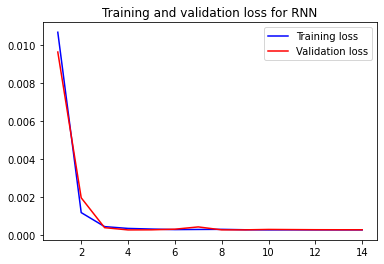

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs = range(1, len(acc1) + 1)

plt.plot(epochs, loss1, 'b', label = 'Training loss')
plt.plot(epochs, val_loss1, 'r', label = 'Validation loss')

plt.title('Training and validation loss for RNN')
plt.legend()
plt.show()

<br/>

## **<font color = blue>6. Prediction</font>**

##### **Prediction**

In [ ]:
train_predict1 = model1.predict(X_train)
test_predict1 = model1.predict(X_test)

##### **Inverse Scaling**

In [ ]:
train_predict1 = scaler.inverse_transform(train_predict1)
test_predict1 = scaler.inverse_transform(test_predict1)

y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

y_train = y_train.reshape(-1, 1)
y_train = scaler.inverse_transform(y_train)

<br/>

## **<font color = blue>7. Model Accuracy</font>**

##### **R-squared value**

In [ ]:
print('Test Accuracy Score : {}'.format(r2_score(y_test, test_predict1)))

print('\nTrain Accuracy Score : {}'.format(r2_score(y_train, train_predict1)))

Test Accuracy Score : 0.9512604959974583

Train Accuracy Score : 0.988602114622617


##### **Plotting <font color = gree>Actual</font> vs <font color = gree>Predicted</font> value for <font color = gree>Test</font> dataset**

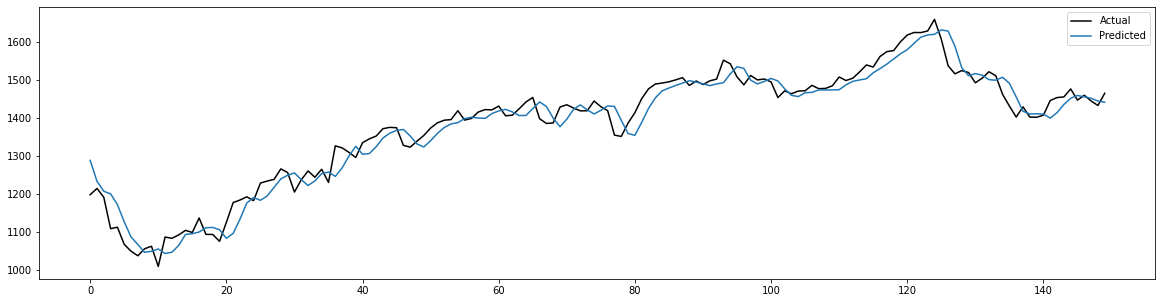

In [ ]:
plt.figure(figsize = (20, 5))

plt.plot(y_test, label = 'Actual', color = 'black')
plt.plot(test_predict1, label = 'Predicted')
    
plt.legend()
plt.show()

<br/>
<br/>

# **<font color = red>Textual Analysis</font>**
<br/>

## <font color = blue>**1. Importing Necessary Modules**</font>

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

## <font color = blue>**2. Getting the Dataset**</font>

##### **Connect to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##### **Load the Dataset**

In [ ]:
sdf = pd.read_csv('drive/My Drive/Datasets/india-news-headlines.csv')

<br/>

## <font color = blue>**3. Reconnaissance**</font>

##### **First few rows of the Dataset**

In [ ]:
sdf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


##### **Last few rows of the Dataset**

In [ ]:
sdf.tail()

,publish_date,headline_category,headline_text
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


##### **Unique values of the <font color = green>headline_category</font>**

In [ ]:
sdf['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

##### **Shape of the Dataset**

In [ ]:
sdf.shape

(3297172, 3)

##### **Data types**

In [ ]:
strain.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

<br/>

## <font color = blue>**4. Feature Engineering**</font>

##### **Splitting the Dataset into <font color = green>Train</font> and <font color = green>Test</font> set.**

In [ ]:
strain = sdf[sdf['publish_date'] < 20180101]
stest = sdf[sdf['publish_date'] > 20180101]

##### **Replacing all the non-letter characters with space**

In [ ]:
data = strain['headline_text']
data.replace("[^a-zA-Z]"," ", regex=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


##### **Making all the characters lower case**

In [ ]:
sdf['headline_text'] = sdf['headline_text'].str.lower()

In [ ]:
sdf.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,status quo will not be disturbed at ayodhya; s...
2,20010102,unknown,fissures in hurriyat over pak visit
3,20010102,unknown,america's unwanted heading for india?
4,20010102,unknown,for bigwigs; it is destination goa


In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
new= sdf['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

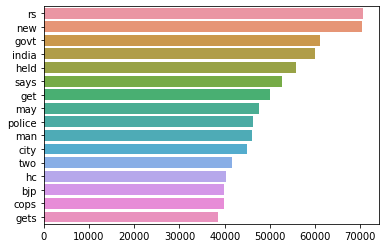

In [ ]:
counter=Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)
plt.show()

In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

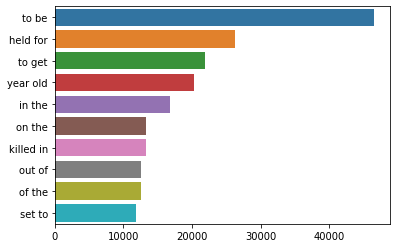

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(sdf['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)
plt.show()

In [ ]:
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

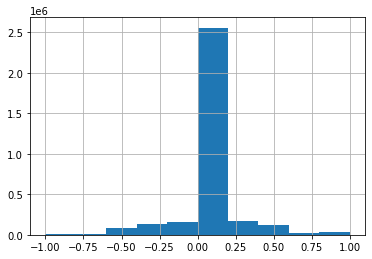

In [ ]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
sdf['polarity_score']=sdf['headline_text'].\
   apply(lambda x : polarity(x))
sdf['polarity_score'].hist()
plt.show()

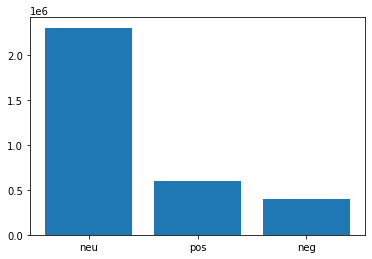

In [ ]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
sdf['polarity']=sdf['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(sdf.polarity.value_counts().index,
        sdf.polarity.value_counts())
plt.show()

In [ ]:
sdf[sdf['polarity']=='pos']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  extra buses to clear tourist traffic
13          will qureshi's return really help the govt?
31                 extra buses to clear tourist traffic
39          will qureshi's return really help the govt?
Name: headline_text, dtype: object

In [ ]:
sdf[sdf['polarity']=='neg']['headline_text'].head()

66         destroying myths and doubts on sexuality
87         powerless north india gropes in the dark
105                        10-year-old girl missing
132              net lottery: a winner or a sucker?
143    mental illness can pass from parent to child
Name: headline_text, dtype: object